In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic\ch05-optimization
c:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic


In [15]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 1. mnist 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄이기
x_train = x_train[:300]
t_train = t_train[:300]

# 가중치 감소 설정
# weight_decay_lamda = 0 # 감소 설정하지 않을 경우 
weight_decay_lamda = 0.1


# 2. 학습 설정
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                        output_size=10, weight_decay_lambda=weight_decay_lamda)
optimizer = SGD(lr=0.01) 

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list =[]
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

epoch: 0, train acc: 0.1, test acc:0.1055
epoch: 1, train acc: 0.1, test acc:0.1092
epoch: 2, train acc: 0.12333333333333334, test acc:0.1155
epoch: 3, train acc: 0.13, test acc:0.1222
epoch: 4, train acc: 0.14, test acc:0.1316
epoch: 5, train acc: 0.16, test acc:0.1425
epoch: 6, train acc: 0.17333333333333334, test acc:0.1534
epoch: 7, train acc: 0.19333333333333333, test acc:0.166
epoch: 8, train acc: 0.22666666666666666, test acc:0.1782
epoch: 9, train acc: 0.23666666666666666, test acc:0.1898
epoch: 10, train acc: 0.25333333333333335, test acc:0.2045
epoch: 11, train acc: 0.28, test acc:0.2199
epoch: 12, train acc: 0.30666666666666664, test acc:0.2275
epoch: 13, train acc: 0.32, test acc:0.2361
epoch: 14, train acc: 0.37, test acc:0.2495
epoch: 15, train acc: 0.41333333333333333, test acc:0.2666
epoch: 16, train acc: 0.43333333333333335, test acc:0.2806
epoch: 17, train acc: 0.4633333333333333, test acc:0.3061
epoch: 18, train acc: 0.49, test acc:0.3299
epoch: 19, train acc: 0.5266

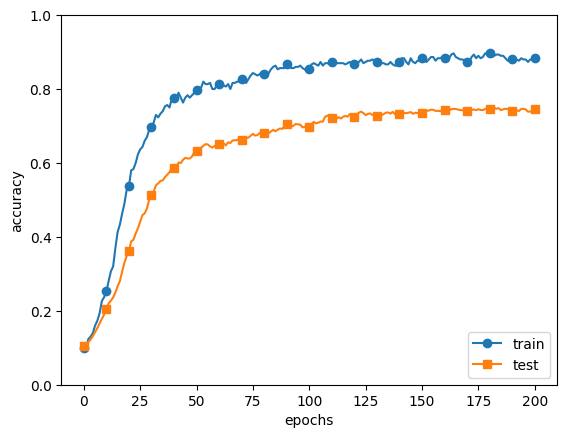

In [16]:
# 3. 모델 학습 
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch: " + str(epoch_cnt) +", train acc: "+ str(train_acc) +", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

# 4. 그래프
markers = {'train' : 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker = 'o', label='train', markevery = 10)
plt.plot(x, test_acc_list, marker = 's', label='test', markevery = 10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 